# Problem set 2

## General directions
<ul>
    <li>Some of the following exercises are numerical. They should be performed directly within this notebook. Other exercises are analytical, and should be solved on attached documents. In the latter case, handwritten papers are acceptable, but please make sure to write in a comprehensible manner.</li>
    <li>For the numerical tasks, please comment your code to explain what does what. Use meaningful names for variables and functions. </li>
    <li>We will need to be able to run the notebook. Make sure that there are no dependencies in the notebook based on files on your computer!</li>
    <li>Feel free to look online for help! Python documentation is <a href="https://docs.python.org/3/">here</a>, NumPy documentation <a href="https://numpy.org/doc/stable/">here</a>, and the Qiskit manual is <a href="https://qiskit.org/documentation/">here</a>. Some specific pages of Qiskit documentation or other useful sources are linked in the relevant questions.</li>
</ul>


$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

# 2.0 - Dependencies
Add all relevant dependencies for the problems to the following cell. Please avoid the <code>import</code> command outside this cell.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import qiskit
plt.rc('font', size=14) 

# 2.1 - Gate identities (6 pts. total)
When designing quantum circuits, it is often useful to consider some gate identities. One of the possible ways to prove them is to compare the unitary matrices; you can obtain the unitary matrix corresponding to a circuit in Qiskit using the procedure outlined <a href="https://medium.com/mdr-inc/checking-the-unitary-matrix-of-the-quantum-circuit-on-qiskit-5968c6019a45">here</a>.

## 2.1.a Basic gate identities (2 pts.)
<ol>
    <li>For each one of the following questions, create the relevant Qiskit circuits and prove the equivalences by looking at the unitary matrices.
    <ul>
        <li> Express the <code>X</code>-gate in terms of <code>H</code> and <code>Z</code> gates</li>
        <li> Express the <code>CNOT(ij)</code> gate in terms of <code>H</code> gates and <code>CNOT(ji)</code> gates.</li>
        <li> Express the <code>SWAP</code> gate in terms of <code>CNOT</code> gates.</li>
     </ul></li>
    <li>Proof if the <code>CNOT</code> gate can be written in terms of <code>SWAP</code> gates.</li>
</ol>

In [2]:
def id_1():
    """
    Express the X-gate in terms of H and Z gates
    """
    qc1 = qiskit.QuantumCircuit(1)
    qc2 = qiskit.QuantumCircuit(1)

    qc1.x(0)

    qc2.h(0)
    qc2.z(0)
    qc2.h(0)

    sim  = qiskit.Aer.get_backend('unitary_simulator')

    job1 = qiskit.execute(qc1, sim)
    job2 = qiskit.execute(qc2, sim)

    u1 = job1.result().get_unitary(qc1, decimals = 3).data
    u2 = job2.result().get_unitary(qc2, decimals = 3).data

    print(f'U1 = {u1}\n')
    print(f'U2 = {u2}\n')
    print(f'U1 = U2 ?\n {u1 == u2}\n')

id_1()

U1 = [[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

U2 = [[ 0.+0.j  1.+0.j]
 [ 1.+0.j -0.-0.j]]

U1 = U2 ?
 [[ True  True]
 [ True  True]]



In [3]:
def id_2():
    """
    Express the CNOT(ij) gate in terms of H gates and CNOT(ji) gates
    """
    qc1 = qiskit.QuantumCircuit(2)
    qc2 = qiskit.QuantumCircuit(2)

    qc1.cx(0, 1)

    qc2.h(0)
    qc2.h(1)
    qc2.cx(1, 0)
    qc2.h(0)
    qc2.h(1)

    sim  = qiskit.Aer.get_backend('unitary_simulator')

    job1 = qiskit.execute(qc1, sim)
    job2 = qiskit.execute(qc2, sim)

    u1 = job1.result().get_unitary(qc1, decimals = 3).data
    u2 = job2.result().get_unitary(qc2, decimals = 3).data

    print(f'U1 = {u1}\n')
    print(f'U2 = {u2}\n')
    print(f'U1 = U2 ?\n {u1 == u2}\n')

id_2()

U1 = [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]

U2 = [[ 1.-0.j -0.+0.j  0.+0.j  0.+0.j]
 [-0.+0.j  0.+0.j  0.-0.j  1.-0.j]
 [ 0.+0.j  0.+0.j  1.-0.j -0.+0.j]
 [ 0.-0.j  1.-0.j -0.+0.j -0.+0.j]]

U1 = U2 ?
 [[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]



In [4]:
def id_3():
    """
    Express the SWAP gate in terms of CNOT gates.
    """

    qc1 = qiskit.QuantumCircuit(2)
    qc2 = qiskit.QuantumCircuit(2)

    qc1.swap(0, 1)

    qc2.cx(1, 0)
    qc2.cx(0, 1)
    qc2.cx(1, 0)

    sim  = qiskit.Aer.get_backend('unitary_simulator')

    job1 = qiskit.execute(qc1, sim)
    job2 = qiskit.execute(qc2, sim)

    u1 = job1.result().get_unitary(qc1, decimals = 3).data
    u2 = job2.result().get_unitary(qc2, decimals = 3).data

    print(f'U1 = {u1}\n')
    print(f'U2 = {u2}\n')
    print(f'U1 = U2 ?\n {u1 == u2}\n')

id_3()

U1 = [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]

U2 = [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]

U1 = U2 ?
 [[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]



## 2.1.b Universality of quantum gates (4 pts.)
The <it>size</it>  of a quantum circuit refers to the the number of basic quantum gates it contains (i.e., from a given gate set). It is important to note that, in general, the size of a quantum circuit is dependent on the specific choice of the basis gates.

<ol>
  <li>Let $\mathcal{U}$ be a unitary operator acting on a single qubit. Show that the operator $\mathcal{U}$ can be realized using two qubits (and no further ancillas) by a circuit of constant size, over the basis given by the controlled phase-operator <code>CPHASE</code>($\phi$), where $\phi$ can take any real value, and the Hadamard gate <code>H</code>. The <code>CPHASE</code> gate is the controlled version of the <code>PHASE</code> gate, which on its turn has the form:
$$PHASE = \begin{bmatrix}1 & 0 \\ 0 & e^{i\phi}\end{bmatrix}$$ on the computational basis $\{\ket{0}, \ket{1}\}$. 
  </li>
  <li>Let $c\mathcal{U}$ be the controlled version of a generic one-qubit operator $\mathcal{U}$. Prove that $c\mathcal{U}$ can be implemented by a constant size circuit (with no ancillas) with two qubits, over the basis of single-qubit gates and the <code>CNOT</code> gate.
  <li>Let the unitary gate $\mathcal{V}$, acting on $n$ qubits, satisfy $\mathcal{V} \ket{0}^{\otimes n}=\ket{0}^{\otimes n}$, where $\ket{0}^{\otimes n} = \ket{0}\otimes \ket{0} \otimes \ldots \otimes \ket{0}$. Construct a circuit of size $6n+1$ realizing the controlled version $c\mathcal{V}$ of $\mathcal{V}$ on the basis given by $\mathcal{V}$ itself and by the <code>TOFFOLI</code> gate. You can use ancillas, but you should apply $\mathcal{V}$ only once. </li>
</ol>

# 2.2 - Quantum Random Walks (10 pts. total + 2 optional)
Quantum random walks can be extremely powerful for modeling various different physical phenomena. In this problem, you will explore so-called <i>discrete-time</i> quantum walks (DTQWs). 

A DTQW is defined on two Hilbert spaces $\mathcal{H}_c \otimes \mathcal{H}_p$. The first Hilbert space represents the degree of freedom of a <i>quantum coin</i>, while the second contains the <i>position</i> of the walker. Consider in particular a walk on a ring of 16 nodes. In this case, $\mathcal{H}_c$ has dimension 2 (two possible directions at each step), while $\mathcal{H}_p$ has dimension 4 (bits necessary to represent numbers from 0 to 15). 

At each step, the walker has first tosses the coin, in order to decide in which direction to go. To do so, they apply a unitary operator $\mathcal{C}$, acting only on the first degree of freedom. Then, they apply a conditional shift operator $\mathcal{S}$, which updates the position according to the result of the coin toss. If $\ket{\uparrow}$ and $\ket{\downarrow}$ are the possible states of the coin, then the conditional shift operator has the form:
$$\mathcal{S} = \ket{\uparrow}\bra{\uparrow} \otimes \mathcal{R} + \ket{\downarrow}\bra{\downarrow} \otimes \mathcal{L}$$
where $\mathcal{L}$ and $\mathcal{R}$ are, respectively, the operator shifting the position to the left, and the operator shifting the position to the right.

The purpose of this exercise is to build a DTQW in Qiskit.

### 2.2.a Incrementer circuit (2 pts.)
The first step is to build the $\mathcal{L}$ and $\mathcal{R}$ operators. Here, the position is encoded in $\mathcal{H}_p$, with basis states $\ket{0},\ldots,\ket{15}$. Therefore, the position can be represented using 4 qubits. The $\mathcal{R}$ operator has to map the basis state $\ket{i}$ onto the basis state $\ket{i+1}$. Conversely, $\mathcal{L}\ket{i} = \ket{i-1}$. 

Since the walk is taking place on a ring, you can impose periodic boundary conditions:
$$\mathcal{L}\ket{0} = \ket{15} \,\,\,\,\, ; \,\,\,\,\, \mathcal{R}\ket{15} = \ket{0}.$$

The $\mathcal{R}$ circuit can be implemented using the circuit

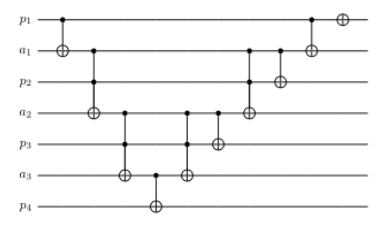

Here, the position is encoded in the qubits labeled $p_1,\ldots,p_4$, while the other qubits, labeled with $a$, are ancillary. 

Create the $\mathcal{R}$ circuit in Qiskit. Plot the diagram of the circuit, and print its $\LaTeX$ source code.

Once you have created your $\mathcal{R}$ operator, turn it into a user-defined gate (have a look <a href="https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.to_gate.html">here</a> for a Qiskit function for his purpose).

In [5]:
def create_R():
    """Creates the circuit for the operator R (incrementer), and returns it

    Returns:
        - (Gate): A Gate object representing the R operator
    """
    # Define the R circuit
    rc = qiskit.QuantumCircuit(7)

    # Apply the necessary CNOT gates to define the action of the circuit
    rc.cx(0, 1)
    rc.ccx(1, 2, 3)
    rc.ccx(3, 4, 5)
    rc.cx(5, 6)
    rc.ccx(3, 4, 5)
    rc.cx(3, 4)
    rc.ccx(1, 2, 3)
    rc.cx(1, 2)
    rc.cx(0, 1)
    rc.x(0)
    print(rc)
    # convert the circuit to a user define gate
    R = rc.to_gate(label = 'R')

    return R


R = create_R()

                                                  ┌───┐
q_0: ──■───────────────────────────────────────■──┤ X ├
     ┌─┴─┐                                   ┌─┴─┐└───┘
q_1: ┤ X ├──■────────────────────────■────■──┤ X ├─────
     └───┘  │                        │  ┌─┴─┐└───┘     
q_2: ───────■────────────────────────■──┤ X ├──────────
          ┌─┴─┐                    ┌─┴─┐└───┘          
q_3: ─────┤ X ├──■─────────■────■──┤ X ├───────────────
          └───┘  │         │  ┌─┴─┐└───┘               
q_4: ────────────■─────────■──┤ X ├────────────────────
               ┌─┴─┐     ┌─┴─┐└───┘                    
q_5: ──────────┤ X ├──■──┤ X ├─────────────────────────
               └───┘┌─┴─┐└───┘                         
q_6: ───────────────┤ X ├──────────────────────────────
                    └───┘                              


## 2.2.b Decrementer circuit (3 pts.)
From the incrementer circuit, now turn to the decrementer circuit $\mathcal{L}$, which has a very similar structure to $\mathcal{R}$. 

Create the $\mathcal{L}$ circuit, plot its diagram and turn it into a user-defined gate.

In [6]:
def create_L():
    """Creates the circuit for the operator L (decrementer), and returns it

    Returns:
        - (Gate): A Gate object representing the R operator
    """
    # Define the R circuit
    lc = qiskit.QuantumCircuit(7)

    # Apply the necessary CNOT gates to define the action of the circuit
    
    lc.x(0)
    lc.cx(0, 1)
    lc.cx(1, 2)
    lc.ccx(1, 2, 3)
    lc.cx(3, 4)
    lc.ccx(3, 4, 5)
    lc.cx(5, 6)
    lc.ccx(3, 4, 5)
    lc.ccx(1, 2, 3)
    lc.cx(0, 1)
    

    print(lc)
    # convert the circuit to a user define gate
    L = lc.to_gate(label = 'L')

    return L


L = create_L()

     ┌───┐                                             
q_0: ┤ X ├──■───────────────────────────────────────■──
     └───┘┌─┴─┐                                   ┌─┴─┐
q_1: ─────┤ X ├──■────■────────────────────────■──┤ X ├
          └───┘┌─┴─┐  │                        │  └───┘
q_2: ──────────┤ X ├──■────────────────────────■───────
               └───┘┌─┴─┐                    ┌─┴─┐     
q_3: ───────────────┤ X ├──■────■─────────■──┤ X ├─────
                    └───┘┌─┴─┐  │         │  └───┘     
q_4: ────────────────────┤ X ├──■─────────■────────────
                         └───┘┌─┴─┐     ┌─┴─┐          
q_5: ─────────────────────────┤ X ├──■──┤ X ├──────────
                              └───┘┌─┴─┐└───┘          
q_6: ──────────────────────────────┤ X ├───────────────
                                   └───┘               


## 2.2.c Conditional shift operator (1 pt.)
Using the previously defined $\mathcal{L}$ and $\mathcal{R}$ operators, you will now need to create the conditional shift operator $\mathcal{S}$. This requires conditioning $\mathcal{R}$ and $\mathcal{L}$ on another qubit, which will represent the coin. 

Create the $\mathcal{S}$ circuit using the previously defined $\mathcal{R}$ and $\mathcal{L}$. To learn how to create the controlled version of a unitary gate, you can have a look <a href="https://qiskit.org/documentation/stubs/qiskit.circuit.ControlledGate.html">here</a>.

In [7]:
def create_s(R, L):
    """Create the shift operator gate

    Args:
        - R (Gate): The quantum Gate representing the increment operation
        - L (Gate): The quantum Gate representing the decrement operation
    Returns:
        - (Gate): The quantum Gate representing the shift operation
    """
    
    qc = qiskit.QuantumCircuit(8)
    # Create a controlled R gate (controlled on state 0)
    RC = R.control(1, ctrl_state = 0)
    # Create a controlled L gate (controlled on state 1)
    LC = L.control(1, ctrl_state = 1)
    qc.append(RC, [0, 1, 2, 3, 4, 5, 6, 7])
    qc.append(LC, [0, 1, 2, 3, 4, 5, 6, 7])
    
    print(qc)
    
    S = qc.to_gate(label = 'Shift')
    return S
    
S = create_s(R, L)

                 
q_0: ──o─────■───
     ┌─┴──┐┌─┴──┐
q_1: ┤0   ├┤0   ├
     │    ││    │
q_2: ┤1   ├┤1   ├
     │    ││    │
q_3: ┤2   ├┤2   ├
     │    ││    │
q_4: ┤3 R ├┤3 L ├
     │    ││    │
q_5: ┤4   ├┤4   ├
     │    ││    │
q_6: ┤5   ├┤5   ├
     │    ││    │
q_7: ┤6   ├┤6   ├
     └────┘└────┘


## 2.2.d Step operator (1 pt.)
Combining the conditional shift operator $\mathcal{S}$ and the coin operator $\mathcal{C}$, you can now create the whole step operator. 

As coin operator, in principle one could choose any operator in $SU(2)$. However, it is a very common choice to use the Hadamard operator $H$ for this purpose.

Using the Hadamard gate <code>H</code> as the coin operator, create the step circuit, and turn it into a user-defined gate. 

In [8]:
def create_step(S):
    """Create the step operator gate

    Args:
        - R (Gate): The quantum Gate representing the shift operation
    Returns:
        - (Gate): The quantum Gate representing the step operation
    """

    qc = qiskit.QuantumCircuit(8)
    # Coin operator is just Hadamard, apply Hadamrd to first qubit
    qc.h(0)
    # Apply the shift operator
    qc.append(S, [0, 1, 2, 3, 4, 5, 6, 7])
    
    print(qc)
    
    # Create the step gate
    step_op = qc.to_gate(label = 'Step')
    
    return step_op

step_gate = create_step(S)

     ┌───┐┌────────┐
q_0: ┤ H ├┤0       ├
     └───┘│        │
q_1: ─────┤1       ├
          │        │
q_2: ─────┤2       ├
          │        │
q_3: ─────┤3       ├
          │  Shift │
q_4: ─────┤4       ├
          │        │
q_5: ─────┤5       ├
          │        │
q_6: ─────┤6       ├
          │        │
q_7: ─────┤7       ├
          └────────┘


## 2.2.e Perform a walk (1 pt.)
A walk is composed simply by a succession of many steps. To create an $n$-step walk, you have to apply the step operator to an initial state $n$ times. Let the initial state be
$$\ket{\psi_0} = \ket{\uparrow} \otimes \ket{3}$$
Create a circuit able to prepare the initial state, then to perform 5 steps of a quantum walk. At the end of the walk, measure all the qubits encoding the position of the walker, and show a histogram of the outcomes.

<b>Note.</b> The outcomes will be, by Qiskit's default behaviour, expressed in binary form. Please translate them into decimal form, in such a way to have a plot of the position probability distribution after 5 steps.

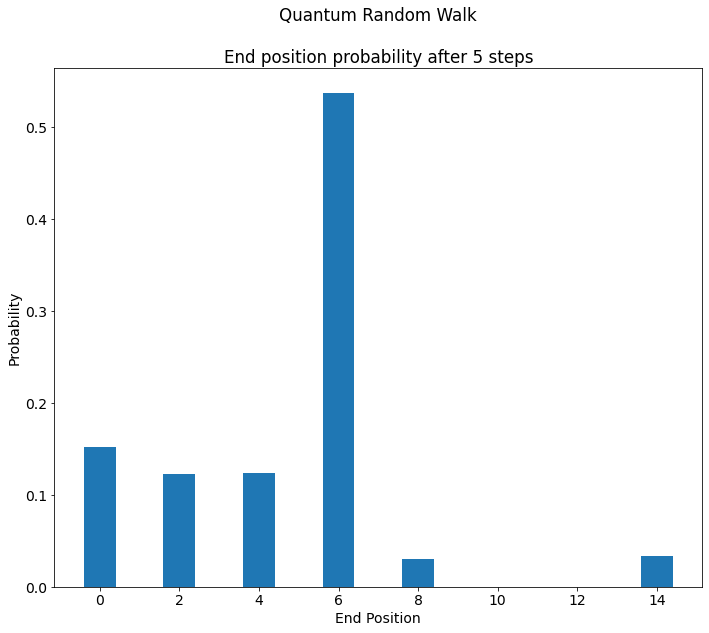

In [9]:
def bin_to_dec(bin_arr):
    """Convert an array of values in binary string representation to decimal representation

    Args:
        - bin_array (array(str)): An array of strings representingnumbers in binary

    """
    # Array to store the decimal representation
    dec_arr = np.zeros(len(bin_arr), dtype = int)
    # Each i is an element of bin_arr
    for i in range(len(bin_arr)):
        b = bin_arr[i]
        # K will represent the power of 2 that each bit in the string corresponds to 
        k = len(b)-1
        # A variable to store the decimal value of a given binary string
        dec = 0
        # Each j j is a bit (1 or 0) in the current binary string
        for j in range(len(b)):
            # Update the value of dec for each bit in the binary representation
            dec += int(b[j])*(2**(k))
            k -= 1
        # Add the decimal value of each bit string to dec_arr
        dec_arr[i] = int(dec)
        
    return dec_arr

    
    
def quantum_walk(step_gate, steps, shots = 10000):
    """Carry out a quantum random walk

    Args:
        - step_gate (Gate): The quantum Gate representing the step operation
        - steps (int): The number of steps in the random walk
        - shots (int): The number of shots to take (number of times to run the circuit) (default = 10000)

     """
    qc = qiskit.QuantumCircuit(8, 4)
    # Initilaise to the number state 3
    qc.x(1)
    qc.x(3)
    # Apply the step gate n times
    for i in range(steps):
        qc.append(step_gate, [0, 1, 2, 3, 4, 5, 6, 7])
        
       # Measure the final state of the qubits
    qc.measure([1, 3, 5, 7], [0, 1, 2, 3])

    # Run the circuit for 10000 shots
    backend = qiskit.Aer.get_backend('aer_simulator')
    job = qiskit.execute(qc, backend, shots = shots)
    counts = job.result().get_counts()
    
    # Since counts is a dictionary of key value pairs, separate these for plotting
    keys = np.array(list((counts.keys())), dtype = str)
    values = np.array(list((counts.values())))
    # Normalise the counts to get probabilities
    # Convert the binary string keys to decimal
    values = values/np.sum(values)
    keys = bin_to_dec(keys)
    
    # Plot the results
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_axes([0.1,0.1,0.9,0.9])
    ax.bar(keys, values)
    ax.set_title(f'Quantum Random Walk\n\nEnd position probability after {steps} steps')
    ax.set_xlabel('End Position')
    ax.set_ylabel('Probability')
    plt.show()

    
quantum_walk(step_gate, 5)

## 2.2.f Transpiling (2 pts.)
<b>Note.</b> It could be useful to do this part after <a href="#transpiling_exercise">exercise 2.4</a> below.

In practice, not all gates are available on a physical quantum computer, depending on its specific technological implementation. However, being able to execute a complete set of quantum gates allows one to perform any quantum calculation. For example, the set composed of the <code>CNOT</code>, the <code>H</code>, and the <code>RZ</code> gate is complete.

Qiskit gives the possibility to rewrite a circuit in terms of a given complete set of gates, have a look <a href="https://qiskit.org/documentation/stubs/qiskit.compiler.transpile.html">here</a> to learn how to proceed. In Qiskit's jargon, this procedure is called <b>transpiling</b>.

Transpile the step operator on the gates set composed by <code>H</code>, <code>CNOT</code> and <code>RZ</code>, and plot the outcoming circuit.

In [10]:
def transpile_s(step_gate):
    """Transpile the step gate 
    Args:
        - step_gate (Gate): The Gate representing the step operator

    Returns:
        - (array(int)): An array of integers whose entries are the decimal representation of the input
    """
    
    qc = qiskit.QuantumCircuit(8, 4)
    qc.append(step_gate, [0, 1, 2, 3, 4, 5, 6, 7])
    
    basis_gates = ["cx", "rz", "h"]

    transpiled_circ = qiskit.compiler.transpile(qc, basis_gates = basis_gates)
    
    print(transpiled_circ)
    
transpile_s(step_gate)

global phase: 3π/4
        ┌───┐    ┌───────┐  ┌──────────┐   ┌───┐    ┌──────────┐ ┌────────┐ »
q_0: ───┤ H ├────┤ Rz(π) ├──┤ Rz(-π/2) ├───┤ H ├────┤ Rz(-π/2) ├─┤ Rz(2π) ├─»
        └───┘    └───────┘  └──────────┘   └───┘    └──────────┘ └────────┘ »
q_1: ────────────────■──────────────────────────────────────────────────────»
        ┌───┐      ┌─┴─┐    ┌──────────┐                                    »
q_2: ───┤ H ├──────┤ X ├────┤ Rz(-π/4) ├────────────────────────────────────»
        └───┘      └───┘    └──────────┘                                    »
q_3: ───────────────────────────────────────────────────────────────────────»
     ┌─────────┐┌──────────┐   ┌───┐    ┌──────────┐ ┌───────┐  ┌──────────┐»
q_4: ┤ Rz(π/2) ├┤ Rz(-π/2) ├───┤ H ├────┤ Rz(-π/2) ├─┤ Rz(π) ├──┤ Rz(-π/2) ├»
     └─────────┘└──────────┘   └───┘    └──────────┘ └───────┘  └──────────┘»
q_5: ───────────────────────────────────────────────────────────────────────»
     ┌─────────┐┌──────────┐   ┌───┐    ┌────

## 2.2.g Comparison with a classical walk (2 pts. - optional)
The DTQW is the quantum counterpart of the classical discrete-time random walk. If you are not familiar with classical random walks, the <a href="https://en.wikipedia.org/wiki/Random_walk#One-dimensional_random_walk">Wikipedia page</a> can be a nice starting place.

Write a Python script which plots the probability distribution after 5 steps of a classical walk on a 16-ring, with a fair coin, and plot in the same graph also the DTQW outcomes. Comment the similarity and differences.


<b>Note.</b> There are (at least) two possible ways of simulating classical walks. You can use a MonteCarlo approach (many repetitions, based on a random number generator), or a more mathematical perspective employing building the transition matrices for a Markov process. Both approaches are acceptable, but keep in mind that MonteCarlo simulations are affected by simulation errors.

<span style="color:red"> It can be seen that the classical and quantum walks share some similarities, in particular, the lowest probability outcomes are the same in both cases (namely, 8 and 14). However, the overall shapes of the distributions are quite different. The outcome of the classical_walk_markov model the exact limiting distribution for this particular problem, and while it can be seen that the classical Monte Carlo random walk converges to this distribution for large number of shots, the quantum random walk does not. One reason for this difference is the nature of the 'randomness' in each model. In the classical model, this arises from the stochastic transitions between adjacent states, whereas in the quantum walk, it arises from the superposition of states and collapsing of the wavefunction due to measurements. Furthermore, how the overall distribution spreads will also be affected by quantum interference effects, which of course will not be present in the classical case. </span>

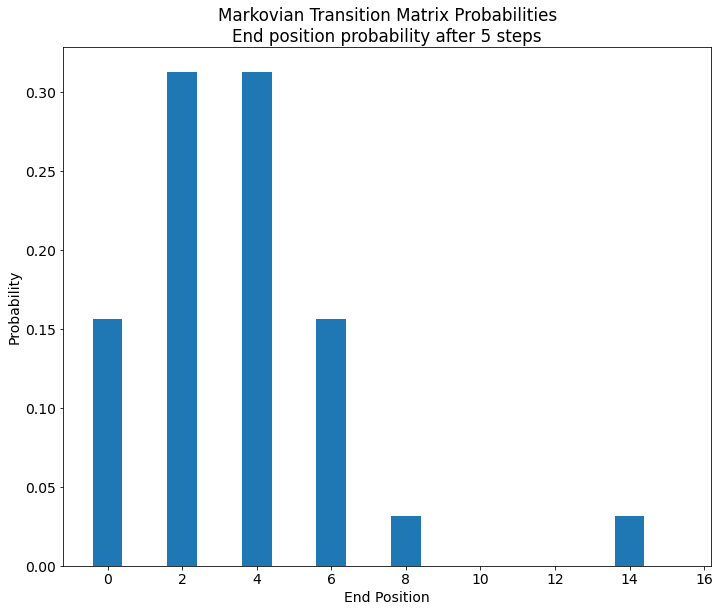

In [11]:
def classical_walk_markov(states = 16, steps = 5, p = 0.5, start = 3):
    """Determine the outcome probabilities of a classical random walk by analysis of the 
       Markov transition matrix

    Args:
        - states (int): The number of possible states that the system can take (default = 16)
        - n (int): The number of steps in the random walk (default = 5)
        - p (float): The probability of moving to the right at each step (default = 0.5)
        - start (int): The starting position of the walk (default = 3)

    """
    # The probability of moving left
    q = 1-p
    # Define the off diagonal elements of the transition matrix. The upper diagonal (right) represents
    # the probability of moving right and the lower diagonal (left) represents the probability of moving left
    right = p*np.ones(states-1)
    left = q*np.ones(states-1)
    # Define the transition matrix for the problem
    trans_matrix = np.diag(right, 1) + np.diag(left, -1)
    # Add two entries for the probability of moving left and right at the boundary
    trans_matrix[0, -1] = q
    trans_matrix[-1, 0] = p

    # Array to store the results
    results = np.zeros(states)
    
    # Define the probability matrix, which is the transition matrix raised to the power of 'steps'
    P = np.linalg.matrix_power(trans_matrix, steps)
    # Store the probabilities in the results array. The probability of finishing at point i, 
    # given starting at point j is (P)_ij .ie the element ij of the probability matrix
    for i in range(states):
        results[i] = P[start, i]
    # Plot the results
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_axes([0.1,0.1,0.9,0.9])
    ax.bar(np.arange(states), results)
    ax.set_title(f'Markovian Transition Matrix Probabilities\nEnd position probability after {steps} steps')
    ax.set_xlabel('End Position')
    ax.set_ylabel('Probability')
    plt.show()

    
classical_walk_markov(16, 5)

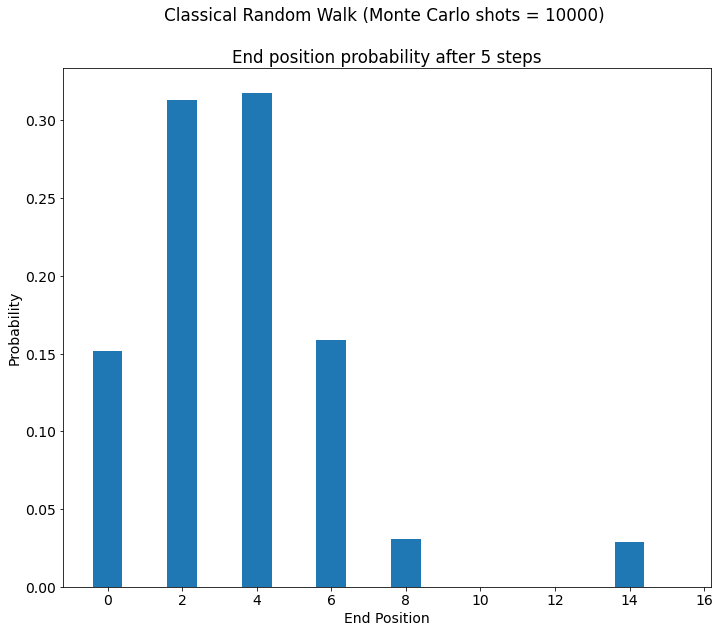

In [12]:
def classical_walk_random(states = 16, steps = 5, p = 0.5, start = 3, shots = 10000):
    """Carry out a classical random walk

    Args:
        - states (int): The number of possible states that the system can take (default = 16)
        - n (steps): The number of steps in the random walk (default = 5)
        - p (float): The probability of moving to the right at each step (default = 0.5)
        - start (int): The starting position of the walk (default = 3)
        - shots (int): The number of times to repeat the reandom walk (default = 1000)

    """
    def move(p):
        """A simple function which moves right with probability p and lecft with probability 1-p

        Args:
            - p (float): The probabbility of moving right

           Returns:
            - (int): +1/-1, indicating a move of right/left
        """
        k = np.random.uniform()
        
        if k <= p:
            return 1
        
        return -1
        
    results = np.zeros(states)
    # Iterate over shots simulations
    for i in range(shots):
        # For each shot, start at the same position
        position = start
        # Complete one random walk
        for j in range(steps):
            # Update the position for each step in the walk
            position += move(p)
        # Get the final position modulo the number of possible states (periodic boundary conditions)
        position = position%states
        # Update the results array at index 'position' by one count
        results[position] += 1
    
    # Normalise the results data
    results = results/shots
    
    # Print the results
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_axes([0.1,0.1,0.9,0.9])
    ax.bar(np.arange(states), results)
    ax.set_title(f'Classical Random Walk (Monte Carlo shots = {shots}) \n\nEnd position probability after {steps} steps')
    ax.set_xlabel('End Position')
    ax.set_ylabel('Probability')
    plt.show()

    
classical_walk_random()

# 2.3 - Bernstein-Vazirani Algorithm (2 pts.)
Let $a$ be an unknown integer number, $0\leq a \leq 2^n$ and let it be represented in binary form as $a=a_0 a_1 a_2 \ldots a_{n-1}$. Consider the function:
$$
    f(x) = a\cdot x = a_0 x_0 \oplus \ldots \oplus a_{n-1}x_{n-1}. 
$$
Suppose that we are able to apply the function on any $n$-bits input through a suitable black-box oracle $\mathcal{U}_f$, working in this way:

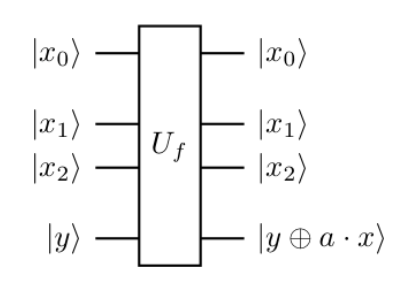

We can determine the value of $a$ by using the Bernstein-Vazirani Algorithm, employing a circuit having the structure:

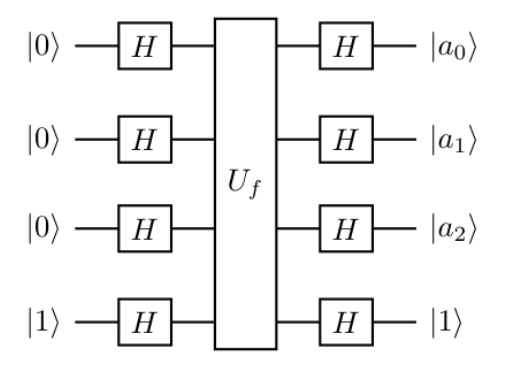

In the next cell, you are given the quantum gate $\mathcal{U}_f$, but you do not know the value of $a$. Create a Bernstein-Vazirani circuit, plot it, and by performing suitable measurements retrieve the value of $a$.

In [13]:
oracle = qiskit.QuantumCircuit(4)
oracle.cx(0,3)
oracle.cx(2,3)


def bv_1(oracle):
    """Create a circuit which represents the Bernstein-Vazirani Algorithm, execute it, print the ciruit and 
       the results
    Args:
        - oracle (QuantumCircuit): A circuit representation of the oracle to be used in the algorithm
        
    Returns:
        - (Counts): The measurement outcome of the circuit
    """
    BV = oracle.to_gate(label = 'BV')

    qc_bv = qiskit.QuantumCircuit(4, 3)
    # Initialise last qubit to |1>
    qc_bv.x(3)
    # Apply the three hadamard gates
    qc_bv.h([0, 1, 2, 3])
    # Apply the oracle
    qc_bv.append(BV, [0, 1, 2, 3])
    qc_bv.h([0, 1, 2, 3])
    #qc_bv.measure([0,1, 2, 3], [0, 1, 2, 3])
    qc_bv.measure([0,1, 2], [0, 1, 2])


    print(qc_bv)


    backend = qiskit.Aer.get_backend("aer_simulator")
    job = qiskit.execute(qc_bv, backend, shots=1)
    counts = job.result().get_counts()
    a = list(counts.keys())[0]
    print(f'a = {int(a, 2)}')
    #return counts
    
bv_1(oracle)

     ┌───┐     ┌─────┐┌───┐┌─┐      
q_0: ┤ H ├─────┤0    ├┤ H ├┤M├──────
     ├───┤     │     │├───┤└╥┘┌─┐   
q_1: ┤ H ├─────┤1    ├┤ H ├─╫─┤M├───
     ├───┤     │  BV │├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─────┤2    ├┤ H ├─╫──╫─┤M├
     ├───┤┌───┐│     │├───┤ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├┤3    ├┤ H ├─╫──╫──╫─
     └───┘└───┘└─────┘└───┘ ║  ║  ║ 
c: 3/═══════════════════════╩══╩══╩═
                            0  1  2 
a = 5


Following the example of the given oracle, write a Python script able to take as input a value of $a$ between 0 and 7, and to output the Qiskit circuit for the relevant oracle, plotting it.

In [14]:
def create_bv_circuit(a, width = 3):
    """Creates, prints and returns a circuit representing the oracle for a given number a

    Args:
        - a (int): Number which defines the action of the oracle (should be between 0 and 7 inclusive)
        - width (int): The width of the binary string by which to represent the number a (default = 3)

    Returns:
        - (QuantumCircuit): Return the object representing the oracles quantum circuit
    """
    oracle_circuit = qiskit.QuantumCircuit(4)
    
    bin_a = np.binary_repr(a, width)
    rev_a = bin_a[::-1]
    for i in range(len(rev_a)):
        if rev_a[i] == '1':
            oracle_circuit.cx(i, width)
    print(f'    a = {a}')
    print(oracle_circuit)
    print()
    
    return oracle_circuit

# Print all oracle circuits for a between 0 and 7
for i in range(8):
    
    create_bv_circuit(i)



    a = 0
     
q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     

    a = 1
          
q_0: ──■──
       │  
q_1: ──┼──
       │  
q_2: ──┼──
     ┌─┴─┐
q_3: ┤ X ├
     └───┘

    a = 2
          
q_0: ─────
          
q_1: ──■──
       │  
q_2: ──┼──
     ┌─┴─┐
q_3: ┤ X ├
     └───┘

    a = 3
               
q_0: ──■───────
       │       
q_1: ──┼────■──
       │    │  
q_2: ──┼────┼──
     ┌─┴─┐┌─┴─┐
q_3: ┤ X ├┤ X ├
     └───┘└───┘

    a = 4
          
q_0: ─────
          
q_1: ─────
          
q_2: ──■──
     ┌─┴─┐
q_3: ┤ X ├
     └───┘

    a = 5
               
q_0: ──■───────
       │       
q_1: ──┼───────
       │       
q_2: ──┼────■──
     ┌─┴─┐┌─┴─┐
q_3: ┤ X ├┤ X ├
     └───┘└───┘

    a = 6
               
q_0: ──────────
               
q_1: ──■───────
       │       
q_2: ──┼────■──
     ┌─┴─┐┌─┴─┐
q_3: ┤ X ├┤ X ├
     └───┘└───┘

    a = 7
                    
q_0: ──■────────────
       │            
q_1: ──┼────■───────
       │    │       
q_2: ──┼────┼────■──
    

<a id="transpiling_exercise"></a>
# 2.4 - Transpiling (4 pts. total)

<it>To transpile</it> means to transfer a circuit from its theoretical form to something really applicable on a real-world quantum computer. To transpile a circuit, we should take into account:
<ul>
    <li>the gates available on the computer we want to consider;</li>
    <li>the <it>topology</it> of the computer, i.e. which qubits can interact with which.</li>
</ul>
In general, transpiling a quantum circuit is not simple at all, and it is usually left to automatic calculators. In this exercise, we will mimick the transpiling procedure, to exploit some interesting relations among quantum gates.

## 2.4.a Change of basis gates (1 pt.)
In the following cell, a simple quantum circuit, involving four qubits, is defined in terms of <code>CNOT</code> gates and <code>H</code> gates. Rewrite the circuit in terms of <code>CZ</code> and <code>H</code> gates. 

<b>Note.</b> This part of the exercise should be perfomed manually, and carefully justified step by step.

In [15]:
circuit = qiskit.QuantumCircuit(4)
circuit.cx(1,2)
circuit.cx(0,1)
circuit.h(2)
circuit.cx(0,3)

circuit.draw()

q_0: ───────■────■──
          ┌─┴─┐  │  
q_1: ──■──┤ X ├──┼──
     ┌─┴─┐├───┤  │  
q_2: ┤ X ├┤ H ├──┼──
     └───┘└───┘┌─┴─┐
q_3: ──────────┤ X ├
               └───┘

## 2.4.b Verification of the new circuit (1 pt.)
Now, code the circuit you obtained in Qiskit. Insert measurement operations in both the "old" and the "new" circuit, and show that they give equivalent outcomes.

In [16]:
# State vector comparison with the new circuit
# Define a new QuantumCircuit

def new_circuit():
    """Construct a circuit from the new gates only, ie CZ and H
        
    Returns:
        - (QuantumCircuit): The newly definned circuit
    """

    new_circuit = qiskit.QuantumCircuit(4)

    new_circuit.h(2)
    new_circuit.cz(1, 2)
    new_circuit.h(1)
    new_circuit.cz(0, 1)
    new_circuit.h(1)
    new_circuit.h(3)
    new_circuit.cz(0, 3)
    new_circuit.h(3)
    
    print(new_circuit)
    
    return new_circuit

def compare_circuits(old_circuit, new_circuit):
    """Do a component wise comparison of the statevectors outputted from the old_circuit and the new_circuit

    Args:
        - (QuantumCircuit): The old circuit difinition (in terms of CX and H)
        - (QuantumCircuit): The old circuit difinition (in terms of CZ and H)

    Returns:
        - (QuantumCircuit): Return the object representing the oracles quantum circuit
    """
    
    backend = qiskit.Aer.get_backend('statevector_simulator')

    job_old = qiskit.execute(circuit, backend, shots = 1)
    state_old = job_old.result().get_statevector(circuit)
    #print(f'{state_old}')

    job_new = qiskit.execute(new_circuit, backend, shots = 1)
    state_new = job_new.result().get_statevector(new_circuit)
    #print(f'{state_new}')

    print(np.round(state_old, 5) == np.round(state_new, 5))

new_circuit = new_circuit()
compare_circuits(circuit, new_circuit)

                                  
q_0: ──────────────■───────■──────
             ┌───┐ │ ┌───┐ │      
q_1: ──────■─┤ H ├─■─┤ H ├─┼──────
     ┌───┐ │ └───┘   └───┘ │      
q_2: ┤ H ├─■───────────────┼──────
     ├───┤                 │ ┌───┐
q_3: ┤ H ├─────────────────■─┤ H ├
     └───┘                   └───┘
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


## 2.4.c Topology/1 (1 pt.)
In the following cell, the basis gates and the adjacency matrix for the IBM quantum computer located in Nairobi are shown. Using the automatic methods provided by Qiskit, transpile the circuit defined in the previous exercise, in order to make it executable with those gates and that topology. Have a look <a href="https://qiskit.org/documentation/stubs/qiskit.compiler.transpile.html">here</a> for some documentation about the automatic transpiling function. Plot the outcoming circuit.

In [17]:
basis_gates = ["cx", "id", "rz", "sx", "x"]
adjacency_matrix = [[0,1],[1,0],[1,2],[2,1],[1,3],[3,1],[3,5],[5,3],[4,5],[5,4],[5,6],[6,5]]

transpiled_circ = qiskit.compiler.transpile(new_circuit, basis_gates = basis_gates, coupling_map = adjacency_matrix)
print(transpiled_circ)

global phase: 7π/4
               ┌─────────┐   ┌────┐  ┌─────────┐                          »
      q_3 -> 0 ┤ Rz(π/2) ├───┤ √X ├──┤ Rz(π/2) ├──────────────────────────»
               └──┬───┬──┘┌──┴────┴─┐└──┬────┬─┘┌─────────┐     ┌───┐     »
      q_2 -> 1 ───┤ X ├───┤ Rz(π/2) ├───┤ √X ├──┤ Rz(π/2) ├──■──┤ X ├──■──»
                  └─┬─┘   ├─────────┤   ├────┤  ├─────────┤┌─┴─┐└─┬─┘┌─┴─┐»
      q_1 -> 2 ─────■─────┤ Rz(π/2) ├───┤ √X ├──┤ Rz(π/2) ├┤ X ├──■──┤ X ├»
                          └─────────┘   └────┘  └─────────┘└───┘     └───┘»
      q_0 -> 3 ───────────────────────────────────────────────────────────»
                                                                          »
ancilla_0 -> 4 ───────────────────────────────────────────────────────────»
                                                                          »
ancilla_1 -> 5 ───────────────────────────────────────────────────────────»
                                                                     

## 2.4.d Topology/2 (1 pt.)
Using your IBMq account, you have direct and automatic access to the datasheet of all the freely available IBM quantum computers. Exploting the <code>backend</code> argument of the <code>transpile</code> function, transpile the circuit in such a way that it is executable on the backend <code>ibmq_santiago</code>. Draw the corresponding circuit. By looking at the topology and the available gates on <code>ibmq_santiago</code>, comment analogies and differences from the circuit obtained in the previous exercise.

In [18]:
from qiskit import IBMQ
# Will require previously saved account details to work
provider = IBMQ.load_account() 

santiago_backend = provider.get_backend("ibmq_santiago")

santiago_circ = qiskit.compiler.transpile(new_circuit, backend = santiago_backend)
print(santiago_circ)

global phase: 5π/4
               ┌─────────┐   ┌────┐  ┌─────────┐                      ┌───┐»
      q_3 -> 0 ┤ Rz(π/2) ├───┤ √X ├──┤ Rz(π/2) ├────────────────■─────┤ X ├»
               └──┬───┬──┘┌──┴────┴─┐└──┬────┬─┘┌─────────┐   ┌─┴─┐   └─┬─┘»
      q_2 -> 1 ───┤ X ├───┤ Rz(π/2) ├───┤ √X ├──┤ Rz(π/2) ├───┤ X ├─────■──»
                  └─┬─┘   └──┬───┬──┘┌──┴────┴─┐└──┬────┬─┘┌──┴───┴──┐     »
      q_1 -> 2 ─────■────────┤ X ├───┤ Rz(π/2) ├───┤ √X ├──┤ Rz(π/2) ├──■──»
                             └─┬─┘   └─────────┘   └────┘  └─────────┘┌─┴─┐»
      q_0 -> 3 ────────────────■──────────────────────────────────────┤ X ├»
                                                                      └───┘»
ancilla_0 -> 4 ────────────────────────────────────────────────────────────»
                                                                           »
«                                                                
«      q_3 -> 0 ──■──────────────────────────────────────────────
« 

# 2.5 Measuring an operator (3 pts.)
Let $\mathcal{U}$ be a single qubit operator, which is both Hermitian and unitary; it means that $\mathcal{U}$ can be seen both as an observable and as a quantum gate. 
<ol>
    <li>Prove that the only possible eigenvalues of $\mathcal{U}$ are $\pm 1$.
    <li>Suppose in particular that $\mathcal{U}$ has exactly an eigenvalue equal to $1$ and exactly one eigenvalue equal to $-1$. Consider the circuit drawn in figure below and prove that, for any input state $\ket{\psi_{in}}$, it "measures" $\mathcal{U}$, i.e.:
        <ul>
            <li>the output state $\ket{\psi_{out}}$ is an eigenstate of $\mathcal{U}$;</li>
            <li>the outcome of the measurement (on the computational basis) on the first qubit can be bijectively mapped onto the eigenvalue corresponding to the eigenstate $\ket{\psi_{out}}$</li>
        </ul>
 </ol>
 
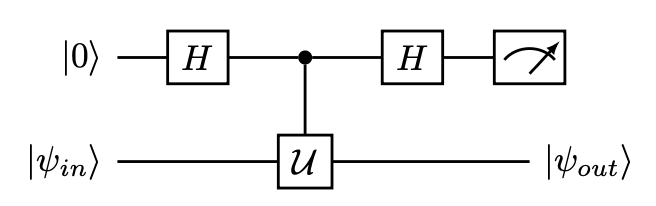